<a href="https://colab.research.google.com/github/kingseo4567/maritime-data-minig/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#5주차 과제
#pandas 활용하기

import pandas as pd
import numpy as np

# github의 자동차 생산 자료를 읽어들인다.
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)

# Total 행 추가
sums = df.select_dtypes(np.number).sum().rename('Total')

# Average 행 추가
avgs = df.select_dtypes(np.number).mean().rename('Average')

# 새로운 데이터프레임으로 합치기 (concat 사용)
total_df = pd.concat([df, sums.to_frame().T, avgs.to_frame().T])     #최신 pandas 버전에서는 반드시 pd.concat()을 사용해야함.

total_df

,2007,2008,2009,2010,2011
China,7.71,7.950000,11.960000,15.84,16.330000
EU,19.02,17.710000,15.000000,16.70,17.480000
US,10.47,8.450000,5.580000,7.60,8.400000
Japan,10.87,10.830000,7.550000,9.09,7.880000
Korea,4.04,3.780000,3.450000,4.20,4.620000
Mexico,2.01,2.050000,1.500000,2.25,2.540000
Total,54.12,50.770000,45.040000,55.68,57.250000
Average,9.02,8.461667,7.506667,9.28,9.541667


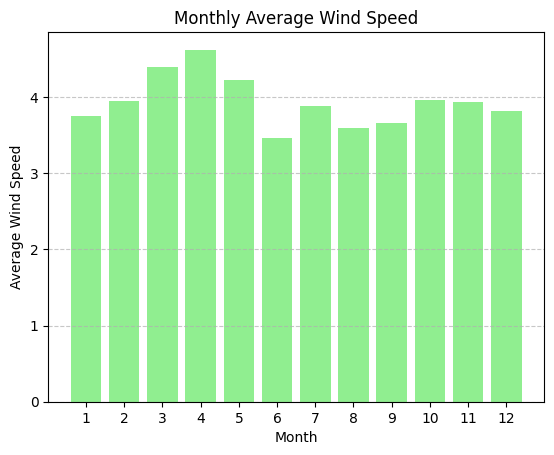

In [15]:
# 5주차 과제 2
# 시계열 데이터 활용하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# github 데이터 불러오기
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')

# 월(month) 데이터 생성
weather['month'] = pd.DatetimeIndex(weather['일시']).month

# 월별 평균풍속을 저장할 리스트
monthly_wind = []

# 월별 평균풍속 계산
for i in range(1, 13):
    monthly_data = weather[weather['month'] == i]  # 월별로 데이터 분리
    monthly_avg_wind = monthly_data['평균풍속'].mean()  # 평균 풍속 계산
    monthly_wind.append(monthly_avg_wind)

# 1에서 12월의 연속된 수를 생성
months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed')
plt.title('Monthly Average Wind Speed')
plt.xticks(months)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()